# Set-Up

Installations and imports:

In [1]:
import os
from math import ceil
import pyvista
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import fenics_helpers

In [31]:
!pip freeze

absl-py==1.1.0
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
anyio==3.5.0
appdirs==1.4.4
approx-post @ git+https://github.com/MABilton/approx_post@0a3ef29ec66e1d4c6a9aaca8788f3098a4496c59
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arraytainers @ git+https://github.com/MABilton/arraytainers@b90da9a7cf3240a7724bf4592f75dccf95885233
asttokens==2.0.5
async-timeout==4.0.2
attrs==21.4.0
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.0
bokeh==2.4.3
certifi==2021.10.8
cffi==1.15.0
charset-normalizer==2.0.12
cppimport==21.3.7
cycler==0.11.0
debugpy==1.6.0
decorator==4.4.2
defusedxml==0.7.1
docutils==0.17.1
entrypoints==0.4
execnet==1.9.0
executing==0.8.3
fastjsonschema==2.15.3
fenics-basix @ file:///src/basix/python
fenics-dolfinx @ file:///src/dolfinx/python
fenics-ffcx @ file:///src/ffcx
fenics-ufl @ file:///src/ufl
flake8==4.0.1
flatbuffers==2.0
fonttools==4.33.3
frozenlist==1.3.0
idna==3.3
imageio==2.19.1
imagesize==1.3.0
importlib-metadata==4.11.3
iniconfig==1.1

Plotting settings:

In [20]:
pyvista.set_plot_theme('document')
pyvista.global_theme.colorbar_orientation = 'vertical'
sargs = dict(title_font_size=15,
             label_font_size=15,
             shadow=True,
             n_labels=5,
             fmt=f"%.{1}f",
             font_family="arial")

Save settings:

In [3]:
fig_save_dir = '../chapter_4/figs'
if not os.path.isdir(fig_save_dir):
    os.mkdir(fig_save_dir)

# Visualise Beam Deformations

Let's first define our fixed parameters (same as those used for training/testing):

In [4]:
fixed_params = {# Parameters found by convergence studies in Notebook [1]:
                'NW': 6,
                'kappa': 3000.00, # in kPa
                # Physical parameters:
                'density': 0.00102, # in g/mm^3
                'g': 9.81, # in m/s^3
               # Beam mesh/geometry parameters:
                'width': 40, # in mm
                'length': 90, # in mm
                'elem_order': 2,
                # Non-linear solver parameters:
                'num_load_steps': 30,
                'rtol': 1e-9, 
                'atol': 1e-9, 
                'max_iter': 50}
fixed_params['elem_size'] =  fixed_params['width']/fixed_params['NW']
fixed_params['NL'] =  ceil(fixed_params['length']/fixed_params['elem_size'])

We can now create our mesh:

In [5]:
mesh = fenics_helpers.create_cuboidal_mesh(*[fixed_params[key] for key in ('length', 'width', 'NL', 'NW')])

Let's now compute the beam deformation for a stiffness of 2 kPa and for angles of 0$^\circ$, 90$^\circ$, and 180$^\circ$:

In [6]:
C_1 = 2.0
beam_angles = [0, 90, 180]
results = []
for i, angle in enumerate(beam_angles):
    print(f'Now simulating beam angle {i+1}/{len(beam_angles)}')
    u = fenics_helpers.simulate_neohookean_beam(mesh, C_1=C_1, beam_angle=angle, **fixed_params)
    results.append(u)

Now simulating beam angle 1/3
Performing load step 1/30...
Performing load step 2/30...
Performing load step 3/30...
Performing load step 4/30...
Performing load step 5/30...
Performing load step 6/30...
Performing load step 7/30...
Performing load step 8/30...
Performing load step 9/30...
Performing load step 10/30...
Performing load step 11/30...
Performing load step 12/30...
Performing load step 13/30...
Performing load step 14/30...
Performing load step 15/30...
Performing load step 16/30...
Performing load step 17/30...
Performing load step 18/30...
Performing load step 19/30...
Performing load step 20/30...
Performing load step 21/30...
Performing load step 22/30...
Performing load step 23/30...
Performing load step 24/30...
Performing load step 25/30...
Performing load step 26/30...
Performing load step 27/30...
Performing load step 28/30...
Performing load step 29/30...
Performing load step 30/30...
Now simulating beam angle 2/3
Performing load step 1/30...
Performing load step

Now let's visualise each of these deformations:

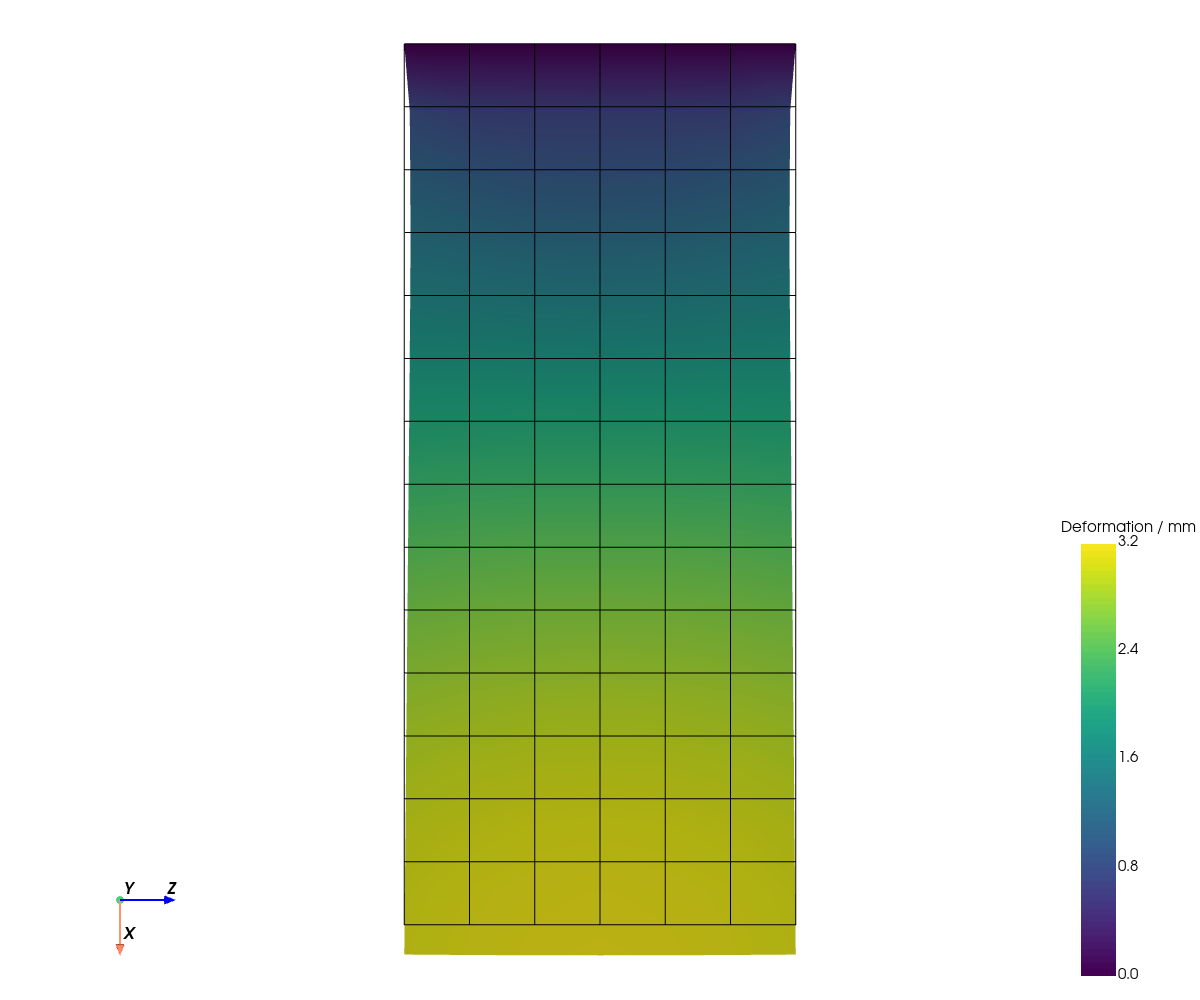

In [22]:
# 0 degress (pure extension) - increase deformation field by 10x so more easily seen:
p = fenics_helpers.plot_deformation(results[0], mesh, beam_angles[0], zoom=1, sargs=sargs)
p.window_size = 1200, 1000
p.save_graphic(os.path.join(fig_save_dir, 'beam_0deg.pdf'), title='beam_0deg')
p.show()

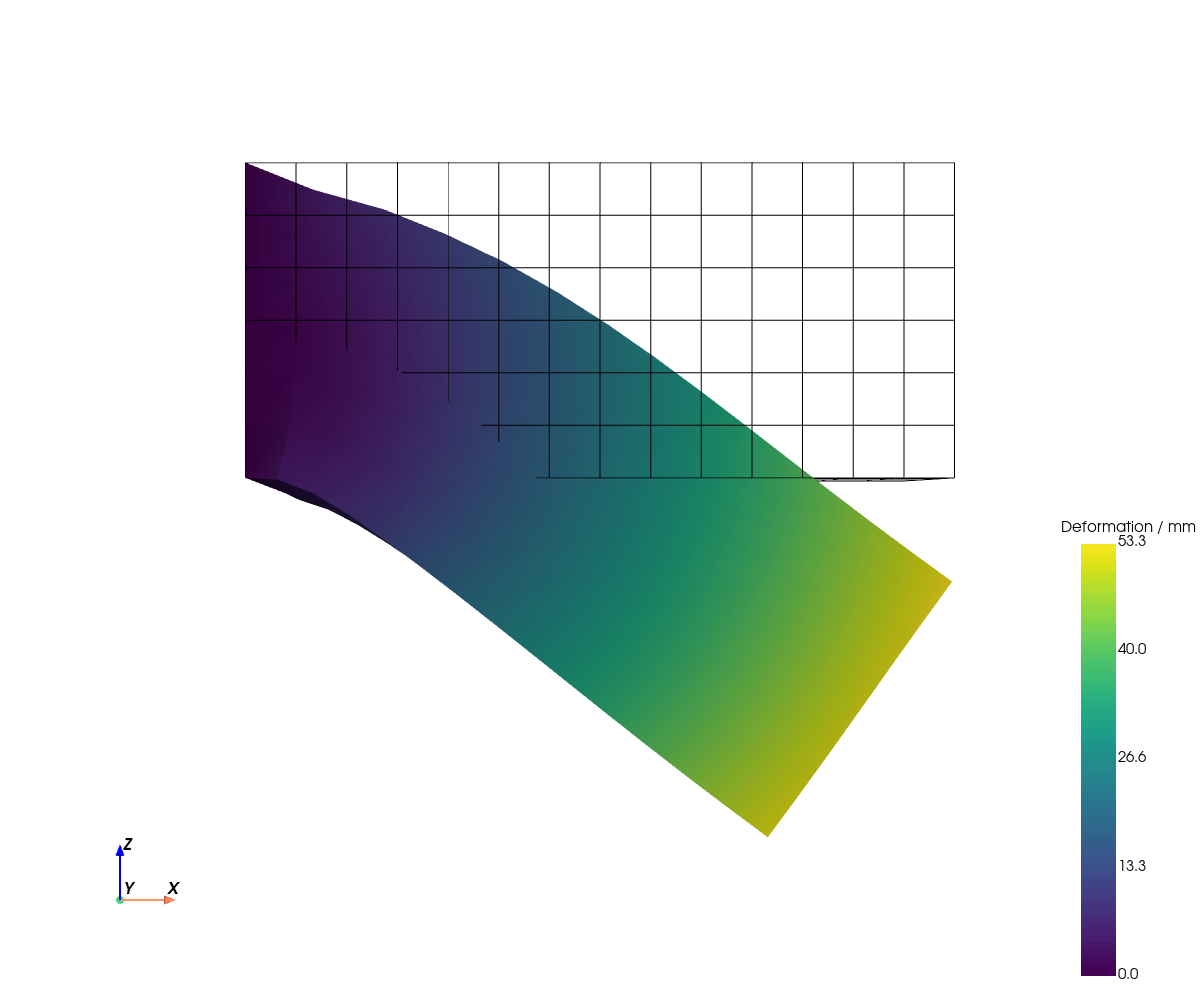

In [30]:
# 90 degress (bending):
p = fenics_helpers.plot_deformation(results[1], mesh, beam_angles[1], zoom=1, sargs=sargs)
p.window_size = 1200, 1000
p.save_graphic(os.path.join(fig_save_dir, 'beam_90deg.pdf'), title='beam_90deg')
p.show()

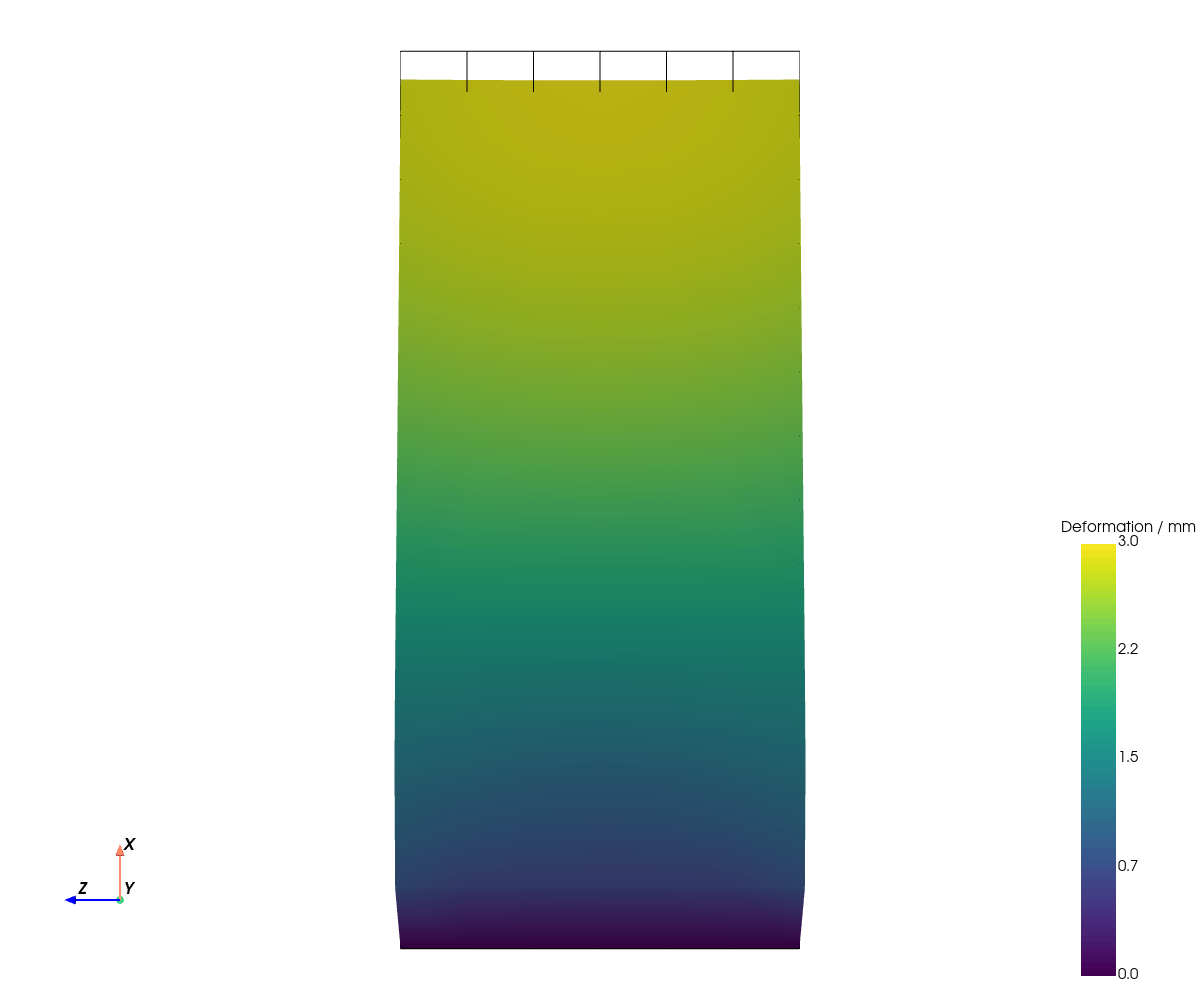

In [27]:
# 180 degress (pure compression) - increase deformation field by 10x so more easily seen:
p = fenics_helpers.plot_deformation(results[2], mesh, beam_angles[2], zoom=1, sargs=sargs)
p.window_size = 1200, 1000
p.save_graphic(os.path.join(fig_save_dir, 'beam_180deg.pdf'), title='beam_180deg')
p.show()

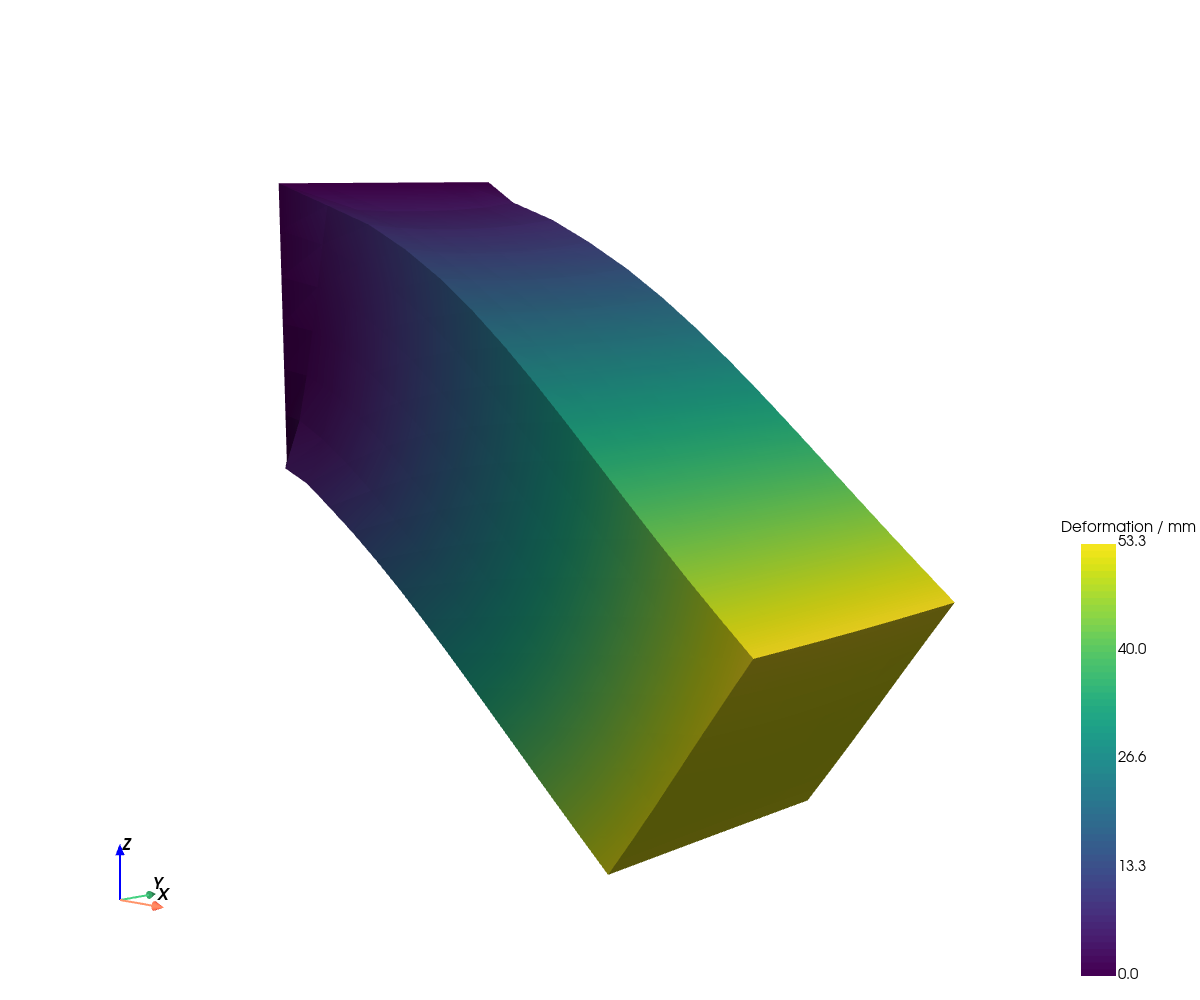

In [29]:
# 90 degress (bending) but at different angle
p = fenics_helpers.plot_deformation(results[1], mesh, beam_angles[1], show_wiremesh=False, line_width=0, zoom=1, sargs=sargs)
p.camera.azimuth = 45
p.camera.elevation = 10
p.window_size = 1200, 1000
p.save_graphic(os.path.join(fig_save_dir, 'beam_90deg_angled.pdf'), title='beam_90deg_angled')
p.show()